# Pendahuluan

**Pendahuluan**

Prediksi harga saham Microsoft dengan menggunakan machine learning, khususnya dalam konteks time series. Tujuan dari prediksi harga saham adalah memberikan wawasan yang dapat membantu investor, analis, dan pengambil keputusan dalam mengidentifikasi tren dan mengambil keputusan investasi yang lebih baik.

Dalam pendekatan ini, kita akan menggunakan model machine learning yang berbeda model regresi time series dengan holt winters dan model ARIMA (AutoRegressive Integrated Moving Average) dengan library lain yang khusus untuk analisis time series.

**Tujuan**

1. **Memprediksi Harga Saham Microsoft**: Tujuan utama dari analisis ini adalah untuk memprediksi harga saham Microsoft. Dalam konteks ini mencoba memahami pergerakan harga saham Microsoft seiring waktu.

2. **Evaluasi Performa Model**: Membangun model model machine learning yang berbeda untuk memprediksi harga saham. Tujuan adalah untuk mengevaluasi dan membandingkan performa keduanya untuk melihat mana yang memberikan prediksi yang lebih baik.

3. **Pengambilan Keputusan Investasi**: Hasil prediksi harga saham Microsoft akan memberikan informasi yang berguna untuk pengambilan keputusan investasi. Investor dan analis dapat menggunakan hasil prediksi ini sebagai referensi dalam membuat keputusan tentang pembelian atau penjualan saham.


Visualisasi adalah elemen penting dalam analisis time series.

- Data harga saham historis Microsoft.
- Hasil prediksi dari kedua model.
- Evaluasi performa model


# Data Wrangling

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bsidom
Your Kaggle Key: ··········


100%|██████████| 26.7k/26.7k [00:00<00:00, 32.6MB/s]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [4]:
df = pd.read_csv('/content/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [5]:
#Splitting the date from datetime

df['Date'] = df['Date'].apply(lambda x: x.split(' ')[0])
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438


In [7]:
#Date is set as an index
df.set_index('Date', inplace = True)

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438


# For EDA


In [55]:
da = pd.read_csv('/content/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')
da.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


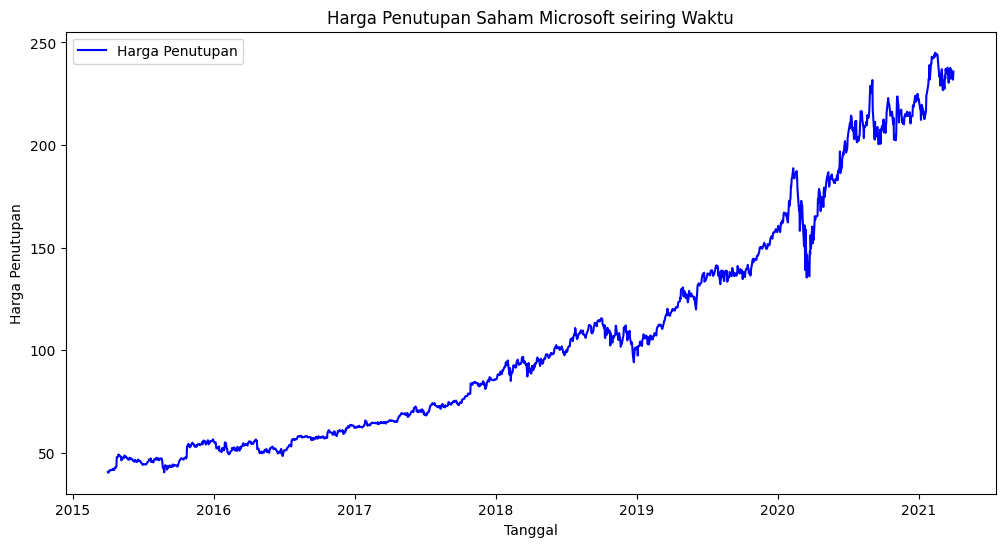

In [75]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(da['Date'], da['Close'], label='Harga Penutupan', color='blue')
plt.title('Harga Penutupan Saham Microsoft seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


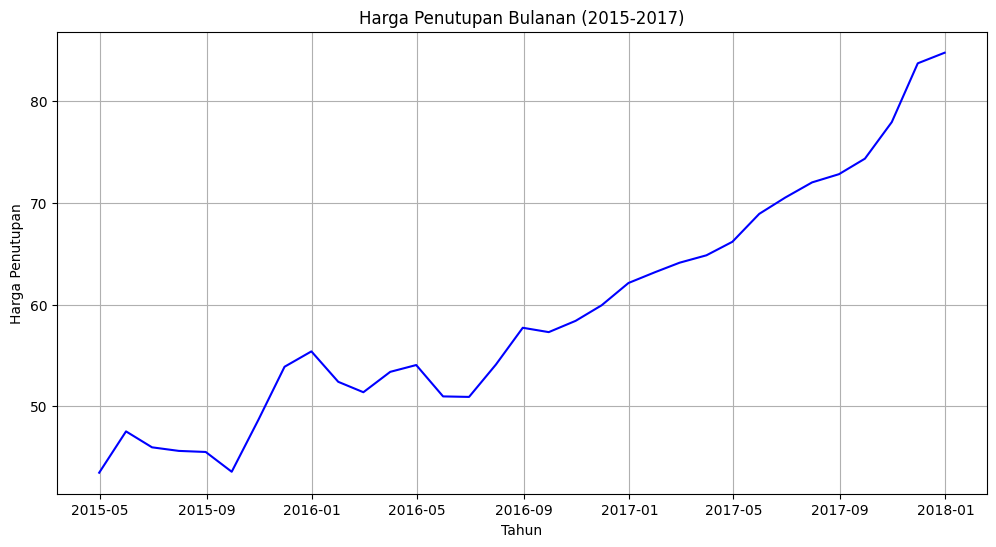

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# set datetime
da['Date'] = pd.to_datetime(da['Date'])

# filter data
filtered_data = da[(da['Date'] >= '2015-01-01') & (da['Date'] <= '2017-12-31')]

# set index
filtered_data.set_index('Date', inplace=True)

# visualisasi pada bulanan
monthly_data = filtered_data.resample('M').mean()

# harga close bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Close'], color='blue')
plt.title('Harga Penutupan Bulanan (2015-2017)')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.grid()


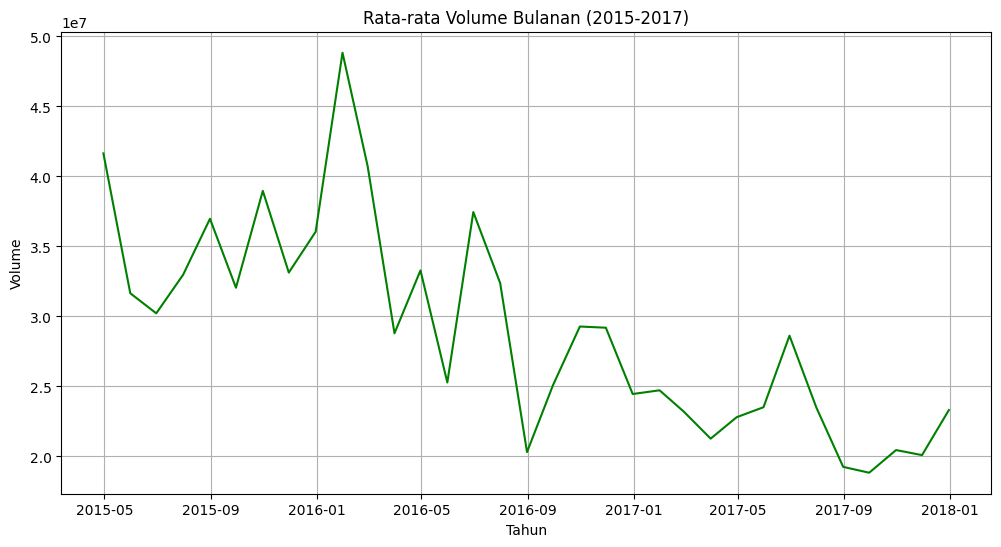

In [70]:
# rata-rata volume bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Volume'], color='green')
plt.title('Rata-rata Volume Bulanan (2015-2017)')
plt.xlabel('Tahun')
plt.ylabel('Volume')
plt.grid()


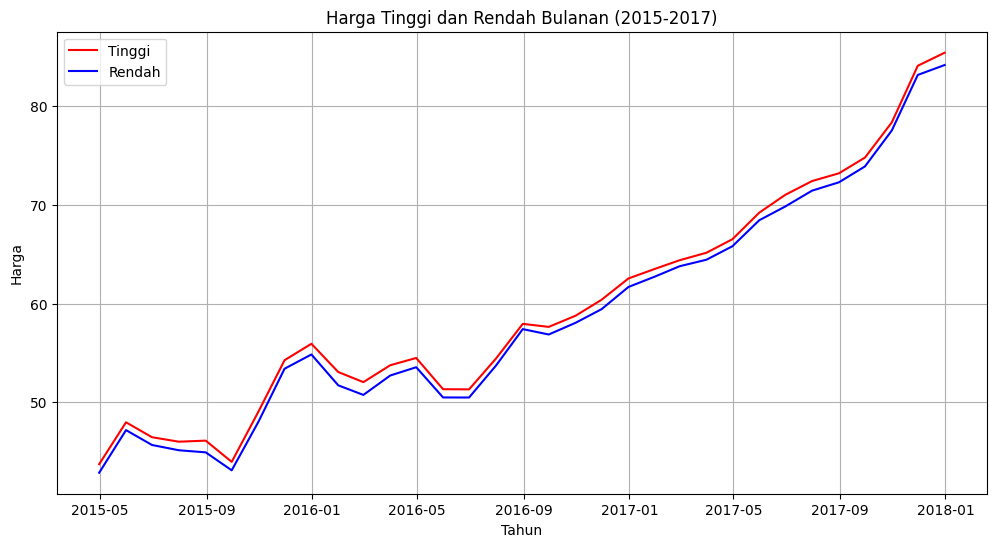

In [71]:
# ahrga tinggi dan rendah bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['High'], color='red', label='Tinggi')
plt.plot(monthly_data['Low'], color='blue', label='Rendah')
plt.title('Harga Tinggi dan Rendah Bulanan (2015-2017)')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid()


Text(0, 0.5, 'Frekuensi')

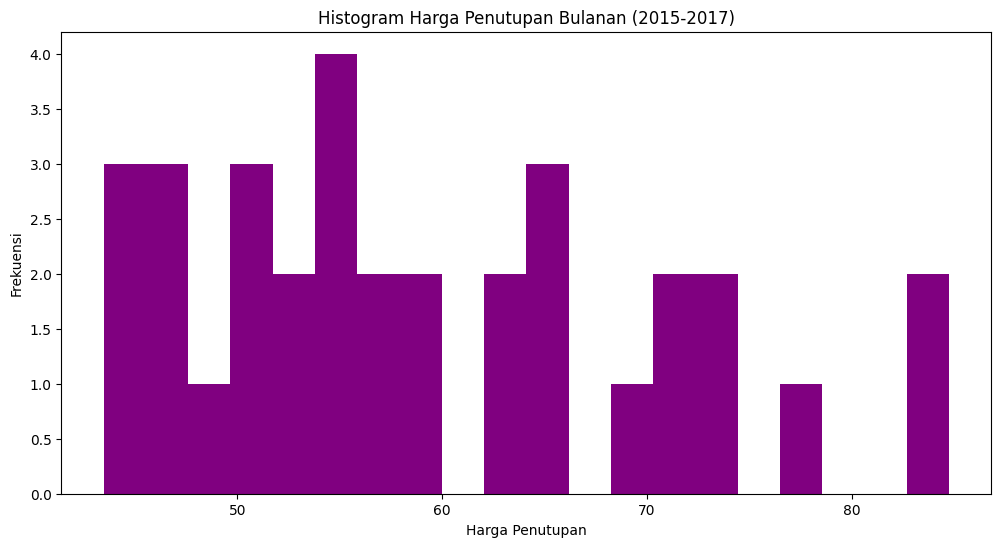

In [72]:
# histogram harga penutupan bulanan
plt.figure(figsize=(12, 6))
plt.hist(monthly_data['Close'], bins=20, color='purple')
plt.title('Histogram Harga Penutupan Bulanan (2015-2017)')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')



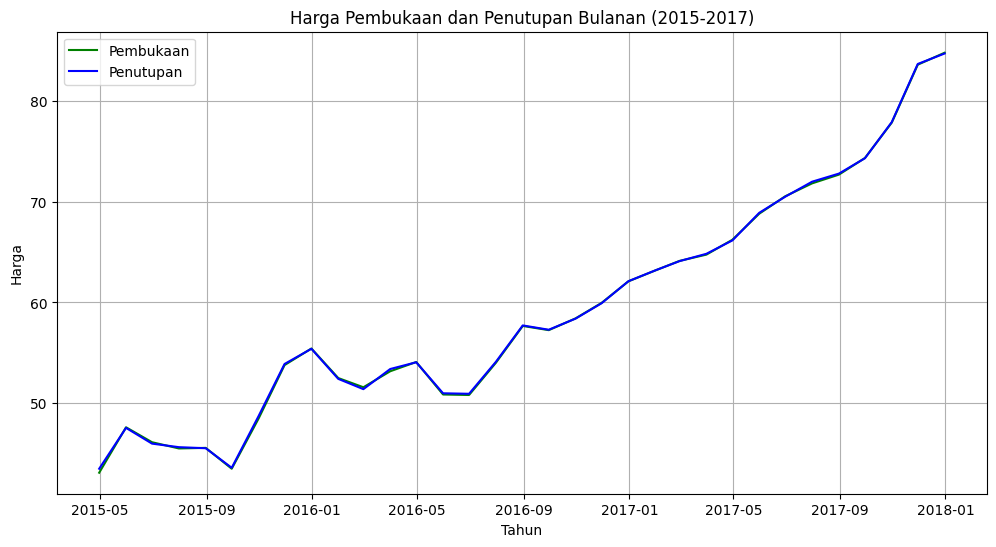

In [73]:
# harga pembukaan dan penutupan
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Open'], color='green', label='Pembukaan')
plt.plot(monthly_data['Close'], color='blue', label='Penutupan')
plt.title('Harga Pembukaan dan Penutupan Bulanan (2015-2017)')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.grid()



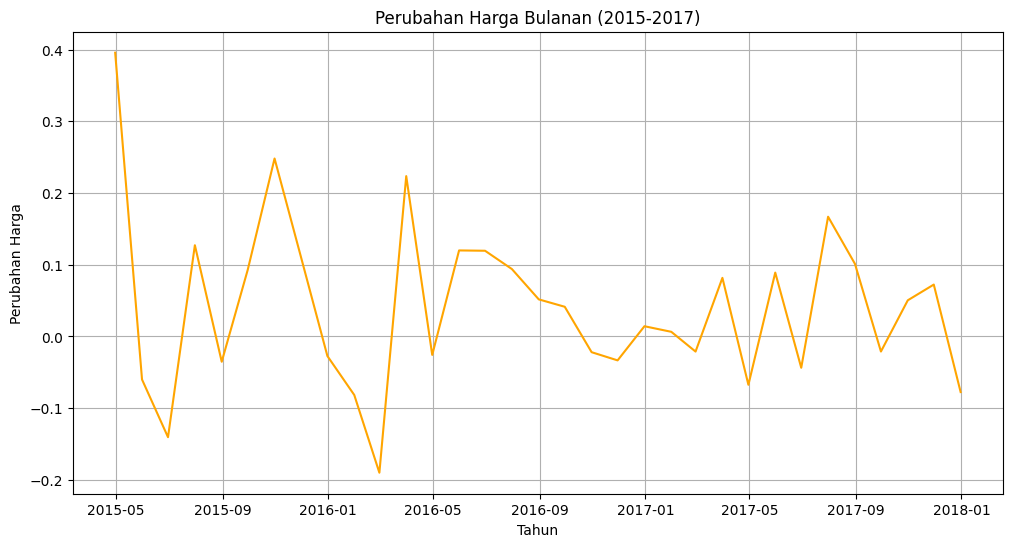

In [74]:
# plot perubahan harga bulanan
monthly_data['Price Change'] = monthly_data['Close'] - monthly_data['Open']
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Price Change'], color='orange')
plt.title('Perubahan Harga Bulanan (2015-2017)')
plt.xlabel('Tahun')
plt.ylabel('Perubahan Harga')
plt.grid()

plt.show()

# Handling Data

In [9]:
df = df.asfreq(freq='MS')
df.isnull().sum()

Open      24
High      24
Low       24
Close     24
Volume    24
dtype: int64

In [10]:
df.fillna(method='backfill',inplace=True)

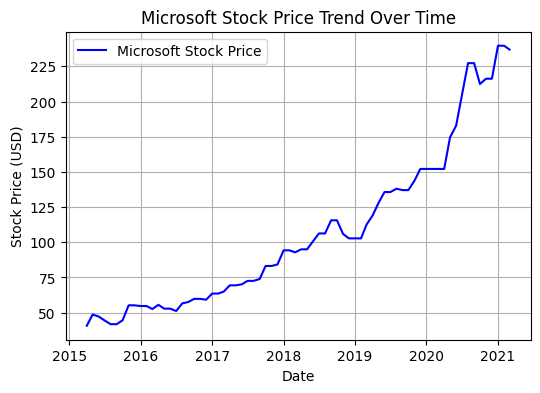

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(df.index, df['Close'], label='Microsoft Stock Price', color='blue')
plt.title('Microsoft Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

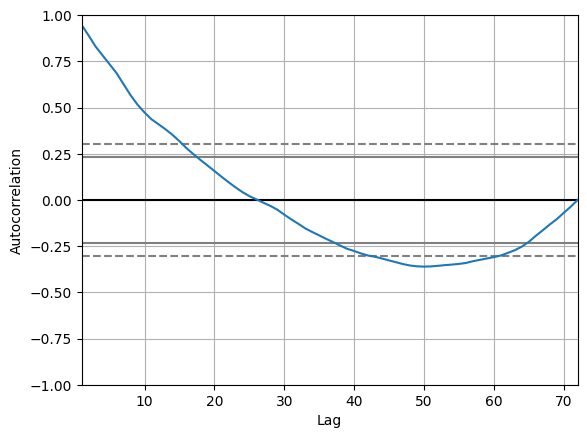

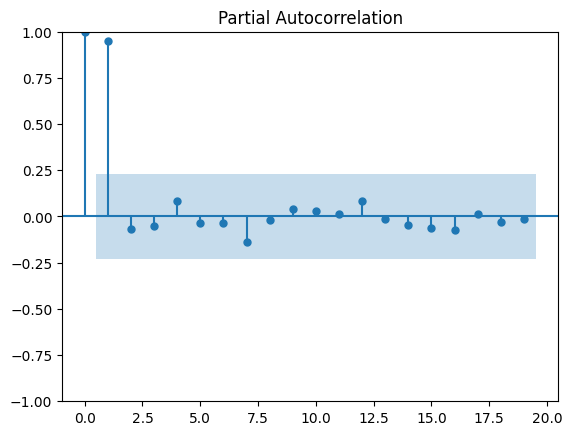

In [12]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

autocorrelation_plot(df['Close'])
plot_pacf(df['Close'])
plt.show()

In [13]:
data = df.Close

In [14]:
data.head()

Date
2015-04-01    40.72
2015-05-01    48.66
2015-06-01    47.23
2015-07-01    44.45
2015-08-01    41.82
Freq: MS, Name: Close, dtype: float64

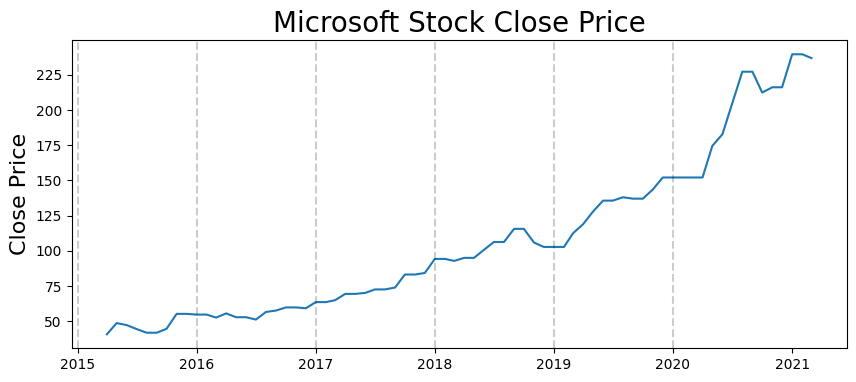

In [15]:
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title('Microsoft Stock Close Price', fontsize=20)
plt.ylabel('Close Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [17]:
adf_test(data)

ADF Statistic: 3.413791
p-value: 1.000000


# Handling Stationary

In [18]:
sta = data.diff().fillna(0)
sta

Date
2015-04-01     0.00
2015-05-01     7.94
2015-06-01    -1.43
2015-07-01    -2.78
2015-08-01    -2.63
              ...  
2020-11-01     3.75
2020-12-01     0.00
2021-01-01    23.44
2021-02-01     0.00
2021-03-01    -2.71
Freq: MS, Name: Close, Length: 72, dtype: float64

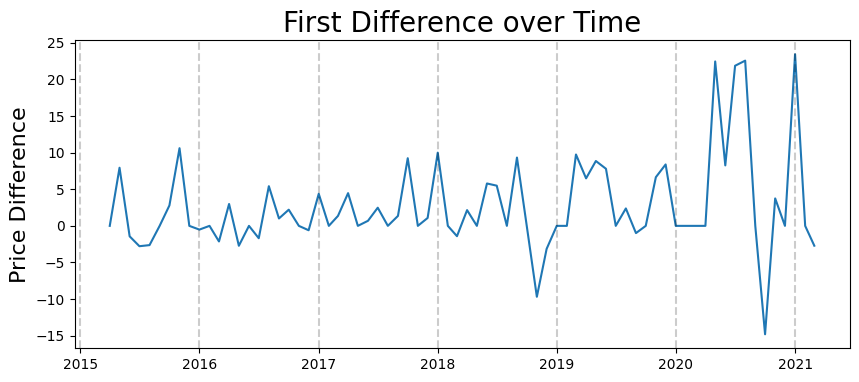

In [19]:
plt.figure(figsize=(10,4))
plt.plot(sta)
plt.title('First Difference over Time', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Autocorrelation

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

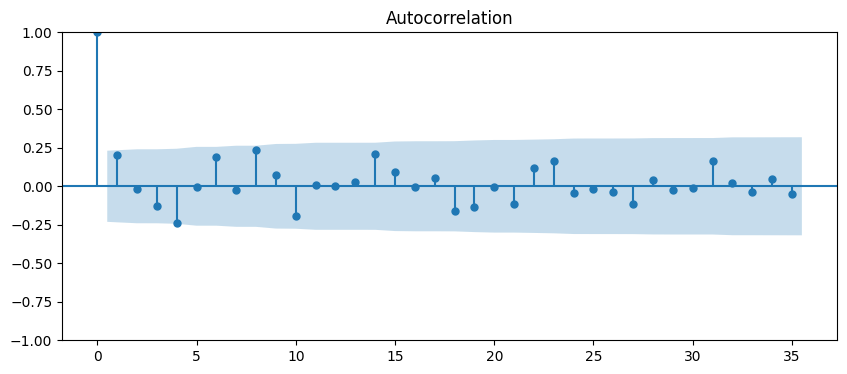

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(sta, lags=35,ax=ax)

ACF membantu untuk identifikasi model Moving Average Model

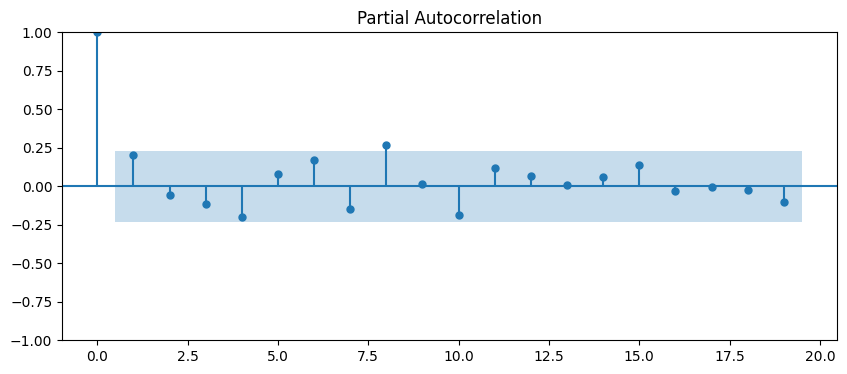

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(sta,ax=ax,method='ywm')

Berdasarkan pada PACF, dapat dimulai dengan Auto Regressive model

In [23]:
#splitting train and test
train=sta[:50]
test=sta[50:]

len(test)

22

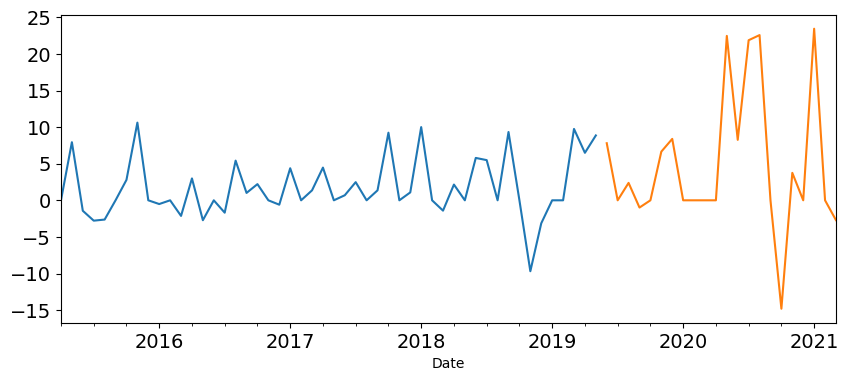

In [24]:
train.plot(figsize=(10,4), fontsize=14)
test.plot(figsize=(10,4), fontsize=14)

plt.show()

In [25]:
train.index

DatetimeIndex(['2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', freq='MS')

In [26]:
df.index

DatetimeIndex(['2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
      

the data train has no frequency

# Auto Regressive Model

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [28]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

Text(0, 0.5, 'Close Price')

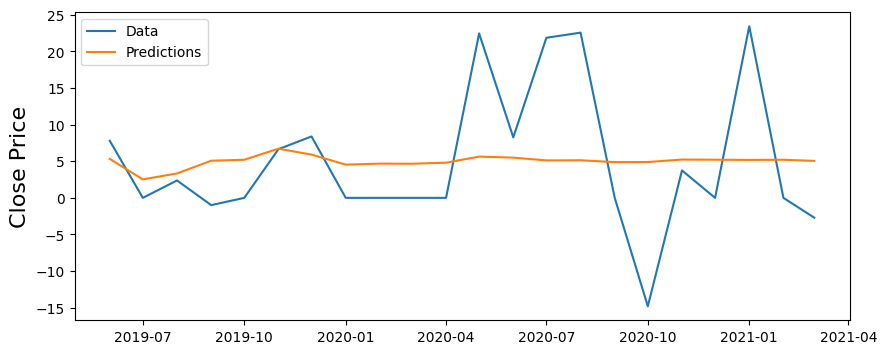

In [29]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Close Price', fontsize=16)

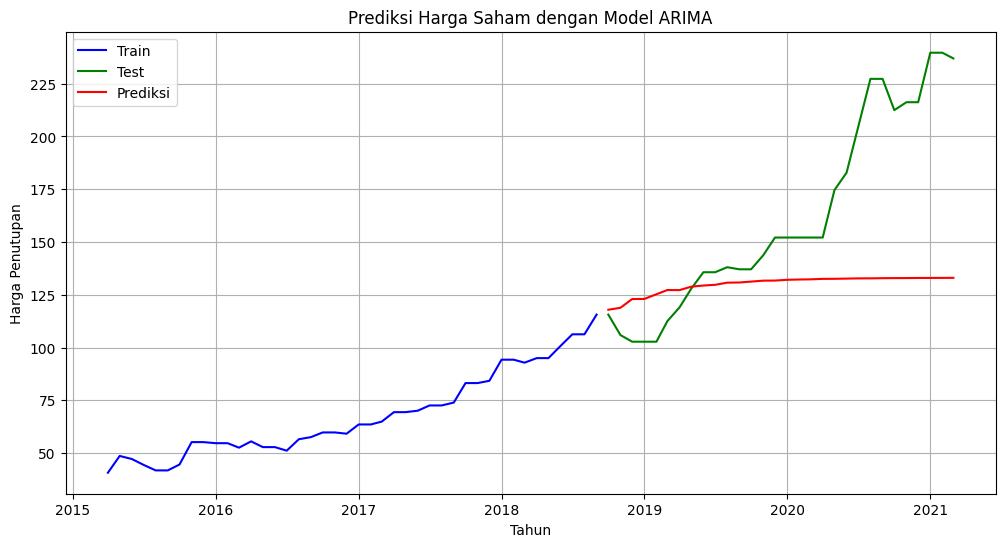

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

ts_data = df['Close']


train_data = ts_data[:-30]
test_data = ts_data[-30:]

model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train', color='blue')
plt.plot(test_data, label='Test', color='green')
plt.plot(test_data.index, forecast, label='Prediksi', color='red')
plt.legend()
plt.title('Prediksi Harga Saham dengan Model ARIMA')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.grid()
plt.show()


### Model Evaluation

In [30]:
def diff_inv(predictions, last_value_data_train):
  series_inverted = np.concatenate([last_value_data_train, predictions],axis=None).cumsum().astype('float64')[1:]
  return series_inverted

In [31]:
y_pred = pd.Series(diff_inv(predictions,data[-1]),index=test.index)

In [32]:
y_pred

Date
2019-06-01    242.266992
2019-07-01    244.791877
2019-08-01    248.127642
2019-09-01    253.200250
2019-10-01    258.406900
2019-11-01    265.126254
2019-12-01    271.036307
2020-01-01    275.578740
2020-02-01    280.254284
2020-03-01    284.916277
2020-04-01    289.721242
2020-05-01    295.356840
2020-06-01    300.851159
2020-07-01    305.968521
2020-08-01    311.104176
2020-09-01    315.990135
2020-10-01    320.886029
2020-11-01    326.118210
2020-12-01    331.331635
2021-01-01    336.511206
2021-02-01    341.718653
2021-03-01    346.764884
Freq: MS, dtype: float64

In [33]:
y_test = data[49:].shift(1) + test
y_test.dropna(inplace=True)
y_test

Date
2019-06-01    135.68
2019-07-01    135.68
2019-08-01    138.06
2019-09-01    137.07
2019-10-01    137.07
2019-11-01    143.72
2019-12-01    152.11
2020-01-01    152.11
2020-02-01    152.11
2020-03-01    152.11
2020-04-01    152.11
2020-05-01    174.57
2020-06-01    182.83
2020-07-01    204.70
2020-08-01    227.27
2020-09-01    227.27
2020-10-01    212.46
2020-11-01    216.21
2020-12-01    216.21
2021-01-01    239.65
2021-02-01    239.65
2021-03-01    236.94
Freq: MS, Name: Close, dtype: float64

In [34]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_percentage_error(y_test,y_pred)

0.664277224476113

In [35]:
mean_absolute_error(y_test, y_pred)

112.74719148303848

In [36]:
data.mean()

107.12652777777778

In [37]:
#splitting train and test
train=data[:50]
test=data[50:]

len(test)

22

### Evaluation


In [38]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(7,1,0))
model_fit = model.fit()

In [39]:
predictions = model_fit.predict(start='2019-06-01', end='2021-03-01')

Text(0, 0.5, 'Close')

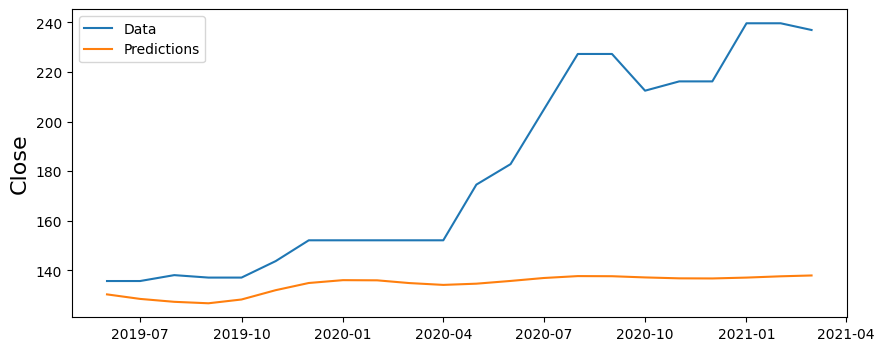

In [40]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Close', fontsize=16)

In [41]:
mean_absolute_error(test, predictions)

45.955833933575555

In [42]:
mean_absolute_percentage_error(test,predictions)

0.22351182395032784

In [68]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error


order = (5, 1, 0)  # Sesuaikan dengan model ARIMA yang Anda latih
model = ARIMA(train, order=order)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Menghitung MAPE
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

mape = calculate_mape(test, forecast)
mae = mean_absolute_error(test, forecast)
# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')



MAE: 50.90
RMSE: 64.46
MAPE: 24.79%


# **Holt-Winters**

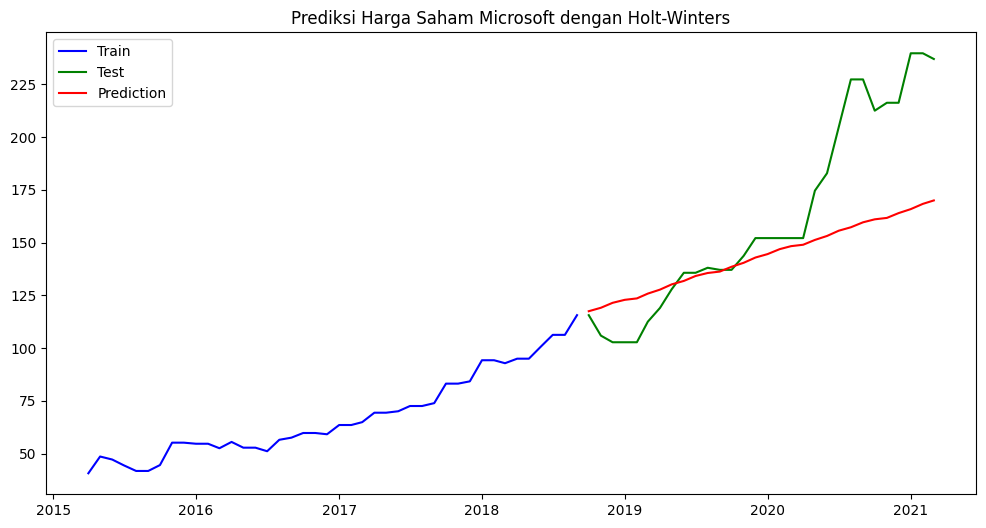

In [76]:
# pisahkan data
train_data = df['Close'][:-30]
test_data = df['Close'][-30:]

# model Holt-Winters
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit(optimized=True)

# prediction
forecast = model_fit.forecast(steps=30)

# Pplot
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train', color='blue')
plt.plot(test_data, label='Test', color='green')
plt.plot(forecast, label='Prediction', color='red')
plt.legend()
plt.title('Prediksi Harga Saham Microsoft dengan Holt-Winters')
plt.show()

## Model Evaluation

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# hitung mae
mae = mean_absolute_error(test_data, forecast)

# hitung rmse
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 25.05
RMSE: 35.85


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data, forecast)

rmse = np.sqrt(mean_squared_error(test_data, forecast))

mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')


MAE: 25.05
RMSE: 35.85
MAPE: 13.28%


# Conclusion

Kesimpulan dari data analisis time series yang digunakan bahwa dengan metode holt winters dapat melakukan prediksi lebih baik daripada metode arima yang menghasilkan rmse dan mape yang lebih baik. Hasil visualisasi juga dapat ditampilkan secara jelas dan mudah dipahami sehingga memang model ini lebih baik dalam menerapkan data microsoft stock prediction forecasting